### DB_1

In [1]:
import pandas as pd
import pymysql

In [2]:
conn = pymysql.connect(host='127.0.0.1'
                , port=3306
                , user = 'root'
                , password='root1234'
                , db = 'stock_pj'
                , charset='utf8'
                ) 

In [3]:
cur = conn.cursor()
cur.execute('SHOW TABLES') # 연동 확인
cur.fetchall() # 테이블 이름 확인

(('album',), ('singer_agency',), ('stock',))

- INSERT

In [89]:
stock_df = pd.read_csv('data/hybe_stock.csv')
stock_df['date'][0]

'2020-10-15'

In [90]:
# insert stock table
for i in range(len(stock_df)):
    cur.execute(f"INSERT INTO stock (agency_name, date, stock_price) VALUES \
                ('{stock_df['agency_name'][i]}', '{stock_df['date'][i]}', {stock_df['stock_price'][i]});") 

In [23]:
bts_df = pd.read_csv('data/BTS_album.csv')
bts_df.head()

,singer,title,album_type,release_date
0,BTS,"Angel Pt. 1 (feat. Jimin of BTS, JVKE & Muni L...",싱글,2023-05-17
1,BTS,The Planet,싱글,2023-05-12
2,BTS,FIFA World Cup Qatar 2022™ (Official Soundtrack),옴니버스,2022-12-09
3,BTS,Dreamers [Music from the FIFA World Cup Qatar ...,싱글,2022-11-20
4,BTS,CHARLIE,정규,2022-10-07


In [24]:
# insert album table
for i in range(len(bts_df)):
    cur.execute(f"INSERT INTO album (singer, title, album_type, release_date) VALUES ('{bts_df['singer'][i]}', '{bts_df['title'][i]}', '{bts_df['album_type'][i]}', '{bts_df['release_date'][i]}');")

In [25]:
# db 반영
conn.commit()

In [26]:
conn.close()

- 예시1: Butter 앨범과 주가의 경향성 탐색

In [4]:
cur.execute('''SELECT distinct s.date, s.stock_price
            FROM album as al JOIN singer_agency as sa ON al.singer = sa.singer JOIN stock as s ON sa.agency_name = s.agency_name
            WHERE s.date >= (
	        SELECT release_date FROM album
	        WHERE title = 'Butter'
            )
            LIMIT 10;''')

10

In [5]:
butter_stock_price =  cur.fetchall()

In [6]:
butter_stock_price

((datetime.date(2021, 5, 21), 261500),
 (datetime.date(2021, 5, 24), 263500),
 (datetime.date(2021, 5, 25), 260500),
 (datetime.date(2021, 5, 26), 259000),
 (datetime.date(2021, 5, 27), 253000),
 (datetime.date(2021, 5, 28), 261000),
 (datetime.date(2021, 5, 31), 265000),
 (datetime.date(2021, 6, 1), 261000),
 (datetime.date(2021, 6, 2), 263500),
 (datetime.date(2021, 6, 3), 269500))

In [7]:
tmp_df = pd.DataFrame(butter_stock_price)
tmp_df.columns = ['date', 'stock_price']
tmp_df.set_index('date')

,stock_price
date,
2021-05-21,261500
2021-05-24,263500
2021-05-25,260500
2021-05-26,259000
2021-05-27,253000
2021-05-28,261000
2021-05-31,265000
2021-06-01,261000
2021-06-02,263500


In [8]:
tmp_df.describe()

,stock_price
count,10.000000
mean,261750.000000
std,4263.866268
min,253000.000000
25%,260625.000000
50%,261250.000000
75%,263500.000000
max,269500.000000


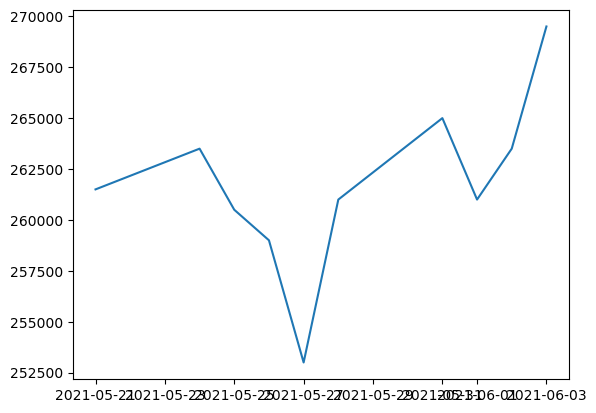

In [9]:
import matplotlib.pyplot as plt
plt.plot(tmp_df['date'], tmp_df['stock_price'])

In [11]:
## 실패... 상관계수 비교할 지표가 없다...
## 하지만, 특정일 대비 상승했는지는 알아볼 수 있다.
## https://wikidocs.net/144793